In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()

In [2]:
data = pd.read_csv("amazon2.csv", thousands = ".", encoding = "latin-1")
data.shape

(6454, 5)

In [19]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0,01/01/1998
1,1999,Acre,Janeiro,0,01/01/1999
2,2000,Acre,Janeiro,0,01/01/2000
3,2001,Acre,Janeiro,0,01/01/2001
4,2002,Acre,Janeiro,0,01/01/2002


In [20]:
data.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,522.696312
std,5.746654,1554.846486
min,1998.000000,0.000000
25%,2002.000000,9.000000
50%,2007.000000,54.000000
75%,2012.000000,269.000000
max,2017.000000,25963.000000


In [21]:
data.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [22]:
data = data.replace(0, np.nan)
data2 = data.dropna(subset=["number"])

In [23]:
data2.describe(include = "all")

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,01/01/2016
freq,NaN,661,534,NaN,317
mean,2007.834847,NaN,NaN,577.947918,NaN
std,5.649076,NaN,NaN,1625.176973,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,16.000000,NaN
50%,2008.000000,NaN,NaN,72.000000,NaN
75%,2013.000000,NaN,NaN,334.000000,NaN


In [26]:
forest_fire_per_month = data2.groupby("month")["number"].sum()
forest_fire_per_month

month
Abril          28364.0
Agosto        740841.0
Dezembro      152596.0
Fevereiro      30952.0
Janeiro        52587.0
Julho         217620.0
Junho         111405.0
Maio           46083.0
Março          35118.0
Novembro      312326.0
Outubro       629665.0
Setembro     1015925.0
Name: number, dtype: float64

In [28]:
months_unique = list(data.month.unique())
forest_fire_per_month = forest_fire_per_month.reindex(months_unique, axis = 0)
forest_fire_per_month

month
Janeiro        52587.0
Fevereiro      30952.0
Março          35118.0
Abril          28364.0
Maio           46083.0
Junho         111405.0
Julho         217620.0
Agosto        740841.0
Setembro     1015925.0
Outubro       629665.0
Novembro      312326.0
Dezembro      152596.0
Name: number, dtype: float64

In [29]:
forest_fire_per_month = forest_fire_per_month.to_frame()
forest_fire_per_month

,number
month,
Janeiro,52587.0
Fevereiro,30952.0
Março,35118.0
Abril,28364.0
Maio,46083.0
Junho,111405.0
Julho,217620.0
Agosto,740841.0
Setembro,1015925.0


In [30]:
forest_fire_per_month.reset_index(level = 0, inplace = True)
forest_fire_per_month

,month,number
0,Janeiro,52587.0
1,Fevereiro,30952.0
2,Março,35118.0
3,Abril,28364.0
4,Maio,46083.0
5,Junho,111405.0
6,Julho,217620.0
7,Agosto,740841.0
8,Setembro,1015925.0
9,Outubro,629665.0


In [41]:
months_on_portuguese = ["Janeiro","Fevereiro","Março","Abril","Maio","Junho","Julho","Agosto","Setembro","Outubro","Novembro","Dezembro"]
months_on_english = ["January","February","March","April","May", "June","July","August","September","October","November","December"]

In [47]:
forest_fire_per_month = forest_fire_per_month.replace(months_on_portuguese,months_on_english)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

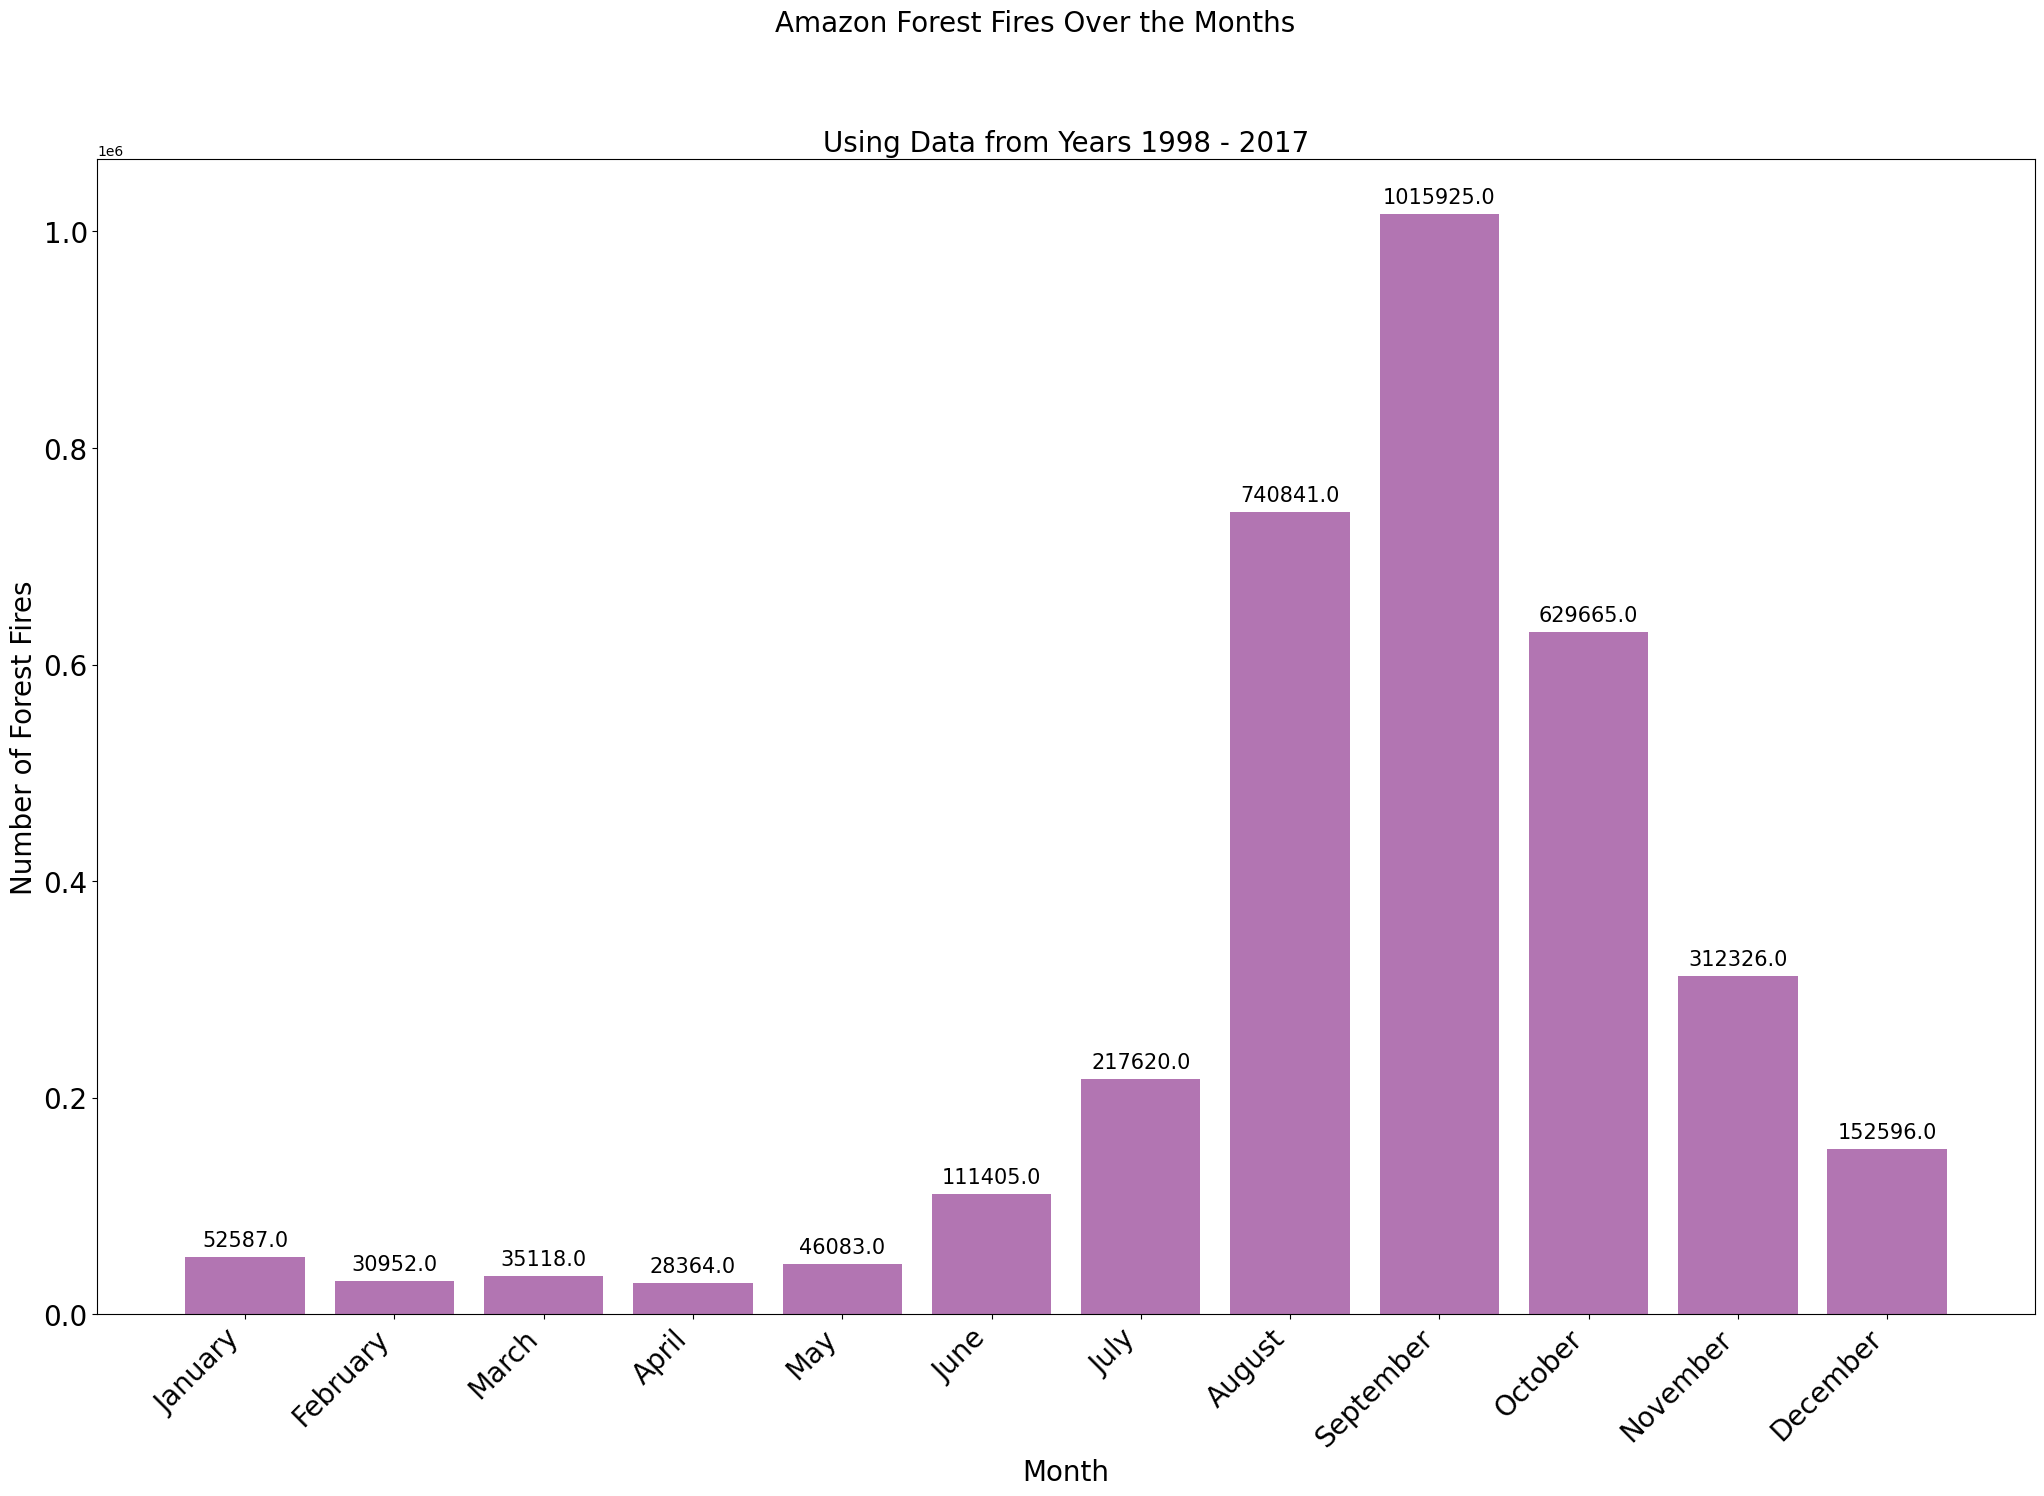

In [50]:
plt.figure(figsize = (25,15))
plt.bar(forest_fire_per_month["month"], forest_fire_per_month["number"], color = (0.5,0.1,0.5,0.6))
plt.suptitle("Amazon Forest Fires Over the Months", fontsize = 20)
plt.title("Using Data from Years 1998 - 2017", fontsize = 20)
plt.xlabel("Month", fontsize = 20)
plt.ylabel("Number of Forest Fires", fontsize = 20)

for i, num in enumerate (forest_fire_per_month["number"]):
    plt.text(
    i,
    num + 10000,
    num,
    ha="center",
    fontsize = 15)
    
plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=20)
plt.setp(plt.gca().get_yticklabels(), fontsize=20)